## Research Question

Is there a moderation effect of number of cylinders on the relationship between mileage (miles per gallon, mpg) and horsepower of an automobile? To answer this question I have taken the [auto-mpg dataset](http://archive.ics.uci.edu/ml/datasets/Auto+MPG) from UCI Machine Learning Repository. Here the response variable is **mpg** (miles per gallon), explanatory variable is **horsepower** and moderator variable is **cylinders** (number of cylinders present in the car)

## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

## Loading Dataset

In [2]:
data = pd.read_csv("auto-mpg.data", delim_whitespace=True, header=None, usecols=[0,1,3], names=['mpg', 'cylinders', 'horsepower'], 

                   dtype={'mpg':np.float64, 'cylinders':'category'})

data['horsepower'] = data['horsepower'].convert_objects(convert_numeric=True)
#data['horsepower'] = pd.to_numeric(data['horsepower'])
data = data.dropna()

C:\Users\Bhaskarjit Sarmah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


## Summarizing Dataset

In [3]:
data.head()

,mpg,cylinders,horsepower
0,18.0,8,130.0
1,15.0,8,165.0
2,18.0,8,150.0
3,16.0,8,150.0
4,17.0,8,140.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 3 columns):
mpg           392 non-null float64
cylinders     392 non-null category
horsepower    392 non-null float64
dtypes: category(1), float64(2)
memory usage: 9.6 KB


In [5]:
data.describe()

,mpg,horsepower
count,392.000000,392.000000
mean,23.445918,104.469388
std,7.805007,38.491160
min,9.000000,46.000000
25%,17.000000,75.000000
50%,22.750000,93.500000
75%,29.000000,126.000000
max,46.600000,230.000000


In [6]:
data['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

## Relationship Between Horse Power and Miles Per Gallon

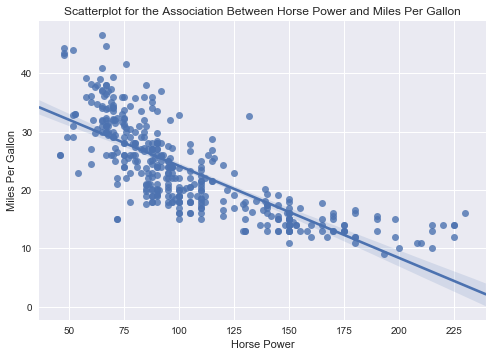

In [7]:
scat1 = sns.regplot(x="horsepower", y="mpg", fit_reg=True, data=data)
plt.xlabel('Horse Power')
plt.ylabel('Miles Per Gallon')
plt.title('Scatterplot for the Association Between Horse Power and Miles Per Gallon')
plt.show()

In [8]:
print ('association between sepal length and petal length')
print (st.pearsonr(data['horsepower'], data['mpg']))

association between sepal length and petal length
(-0.77842678389777586, 7.031989029404564e-81)


As it is seen from both the scatterplot and above pearson correlation coefficient, there is a very strong negative association between the variables **horsepower** and **mpg**. The correlation cofficient is r=-0.77842678389777586 with p-value=7.031989029404564e-81 (which is very very small). So we can conclude that the test is statistically significant and proves that there is a negative association between these two variables.

## Moderation Effect of Number of Cylinders

Now we will check moderation effect of the variable **cylinders** on the above association between the variables **horsepower** and **mpg**. We will check whether the negative association the variables still holds true for all different levels of the moderation variable or not? If yes then we can say there is no moderation effect, and if the answer is no then we can conclude that there is a moderation effect of the variable **cylinders** on the above negative association between **horsepower** and **mpg**

In [9]:
data['cylinders'] = data['cylinders'].astype('int')

data_3 = data[data['cylinders'] == 3]
data_4 = data[data['cylinders'] == 4]
data_5 = data[data['cylinders'] == 5]
data_6 = data[data['cylinders'] == 6]
data_8 = data[data['cylinders'] == 8]

In [10]:
print ('association between horsepower and mpg for 3 cylinders cars')
print (st.pearsonr(data_3['horsepower'], data_3['mpg']))
print ('       ')
print ('association between horsepower and mpg for 4 cylinders cars')
print (st.pearsonr(data_4['horsepower'], data_4['mpg']))
print ('       ')
print ('association between horsepower and mpg for 5 cylinders cars')
print (st.pearsonr(data_5['horsepower'], data_5['mpg']))
print ('       ')
print ('association between horsepower and mpg for 6 cylinders cars')
print (st.pearsonr(data_6['horsepower'], data_6['mpg']))
print ('       ')
print ('association between horsepower and mpg for 8 cylinders cars')
print (st.pearsonr(data_8['horsepower'], data_8['mpg']))

association between horsepower and mpg for 3 cylinders cars
(0.62080740694855674, 0.37919259305144326)
       
association between horsepower and mpg for 4 cylinders cars
(-0.59149124846330781, 3.6248926928684924e-20)
       
association between horsepower and mpg for 5 cylinders cars
(-0.89619382253486901, 0.29264237065094795)
       
association between horsepower and mpg for 6 cylinders cars
(0.013134637143790651, 0.90618449596834627)
       
association between horsepower and mpg for 8 cylinders cars
(-0.58479913884178925, 8.8037129361429645e-11)


From the above coefficients, we can see that results for data with only 4 and 8 number of cylinders are significant. While the negative association between **horsepower** and **mpg** does not hold true for the data with 3, 5 and 6 number of cylinders. Let's also plot these data for all different levels of the variable **cylinder** to visually inspect the relationship.

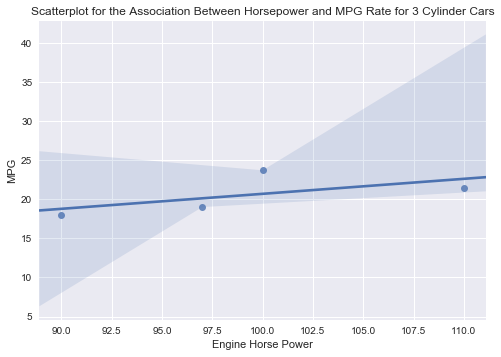

In [11]:
scat1 = sns.regplot(x="horsepower", y="mpg", data=data_3)
plt.xlabel('Engine Horse Power')
plt.ylabel('MPG')
plt.title('Scatterplot for the Association Between Horsepower and MPG Rate for 3 Cylinder Cars')
plt.show()

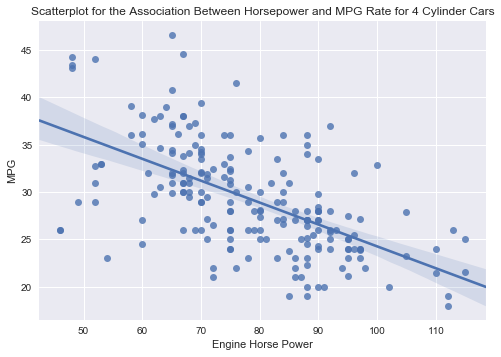

In [12]:
scat2 = sns.regplot(x="horsepower", y="mpg", data=data_4)
plt.xlabel('Engine Horse Power')
plt.ylabel('MPG')
plt.title('Scatterplot for the Association Between Horsepower and MPG Rate for 4 Cylinder Cars')
plt.show()

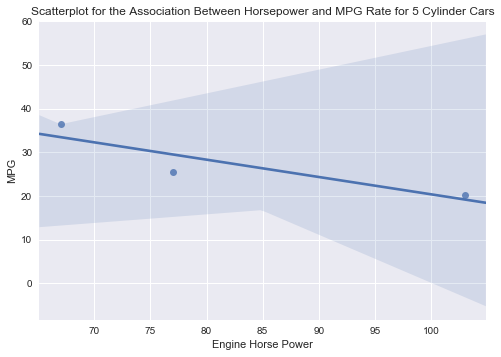

In [13]:
scat3 = sns.regplot(x="horsepower", y="mpg", data=data_5)
plt.xlabel('Engine Horse Power')
plt.ylabel('MPG')
plt.title('Scatterplot for the Association Between Horsepower and MPG Rate for 5 Cylinder Cars')
plt.show()

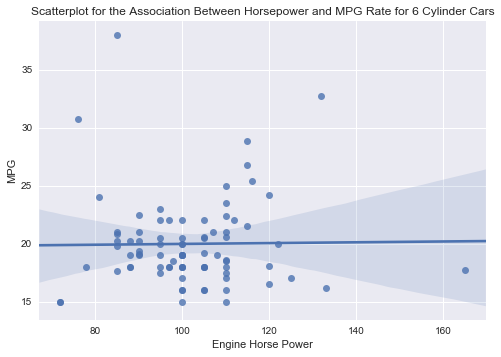

In [14]:
scat4 = sns.regplot(x="horsepower", y="mpg", data=data_6)
plt.xlabel('Engine Horse Power')
plt.ylabel('MPG')
plt.title('Scatterplot for the Association Between Horsepower and MPG Rate for 6 Cylinder Cars')
plt.show()

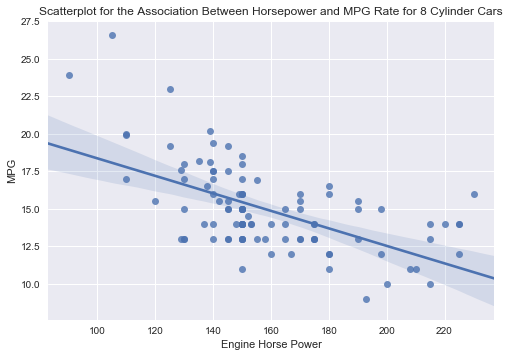

In [15]:
scat5 = sns.regplot(x="horsepower", y="mpg", data=data_8)
plt.xlabel('Engine Horse Power')
plt.ylabel('MPG')
plt.title('Scatterplot for the Association Between Horsepower and MPG Rate for 8 Cylinder Cars')
plt.show()

So, from the above plots we can conclude that though there is a negative association between **horsepower** and **mpg** for the whole dataset. There is a moderation effect of number of cylinders on this negative association. This relationship does not hold true for the data points with 3, 5 and 6 number of cylinders. 